## What is Pandas
You can find everything here:
https://pandas.pydata.org

## 1. Series

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [3]:
obj.values

array([ 3,  6,  9, 12])

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
covid19_confirmed_ca = Series([17923,32623,5836,2224,985],index=['Ontario','Quebec','Alberta','British Columbia','Nova Scotia'])
covid19_confirmed_ca

Ontario             17923
Quebec              32623
Alberta              5836
British Columbia     2224
Nova Scotia           985
dtype: int64

In [6]:
covid19_confirmed_ca['Ontario']

17923

In [7]:
# Check which province had confirmed greater than 10k
covid19_confirmed_ca[covid19_confirmed_ca>10000]

Ontario    17923
Quebec     32623
dtype: int64

In [8]:
'Alberta' in covid19_confirmed_ca

True

In [9]:
covid19_confirmed_ca_dict = covid19_confirmed_ca.to_dict()
covid19_confirmed_ca_dict

{'Ontario': 17923,
 'Quebec': 32623,
 'Alberta': 5836,
 'British Columbia': 2224,
 'Nova Scotia': 985}

In [12]:
covid19_confirmed_ca_series = Series(covid19_confirmed_ca_dict)

In [13]:
covid19_confirmed_ca_series

Ontario             17923
Quebec              32623
Alberta              5836
British Columbia     2224
Nova Scotia           985
dtype: int64

In [14]:
province = ['Ontario','Alberta','Manitoba','Quebec','Nova Scotia']

In [15]:
covid19_confirmed_ca_2_obj = Series (covid19_confirmed_ca,index = province)
covid19_confirmed_ca_2_obj

Ontario        17923.0
Alberta         5836.0
Manitoba           NaN
Quebec         32623.0
Nova Scotia      985.0
dtype: float64

In [16]:
pd.isnull(covid19_confirmed_ca_2_obj)

Ontario        False
Alberta        False
Manitoba        True
Quebec         False
Nova Scotia    False
dtype: bool

In [17]:
pd.notnull(covid19_confirmed_ca_2_obj)

Ontario         True
Alberta         True
Manitoba       False
Quebec          True
Nova Scotia     True
dtype: bool

In [18]:
covid19_confirmed_ca_series

Ontario             17923
Quebec              32623
Alberta              5836
British Columbia     2224
Nova Scotia           985
dtype: int64

In [19]:
covid19_confirmed_ca_series + covid19_confirmed_ca_2_obj

Alberta             11672.0
British Columbia        NaN
Manitoba                NaN
Nova Scotia          1970.0
Ontario             35846.0
Quebec              65246.0
dtype: float64

In [20]:
covid19_confirmed_ca_2_obj.name = 'covid19_confirmed_ca'
covid19_confirmed_ca_2_obj

Ontario        17923.0
Alberta         5836.0
Manitoba           NaN
Quebec         32623.0
Nova Scotia      985.0
Name: covid19_confirmed_ca, dtype: float64

In [21]:
covid19_confirmed_ca_2_obj.index.name = 'Prov'

In [22]:
covid19_confirmed_ca_2_obj

Prov
Ontario        17923.0
Alberta         5836.0
Manitoba           NaN
Quebec         32623.0
Nova Scotia      985.0
Name: covid19_confirmed_ca, dtype: float64

## 2. DataFrames

In [38]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [ ]:
import webbrowser
website='https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html'
webbrowser.open(website)

In [52]:
covid19_frame = pd.read_clipboard()

In [53]:
# SQL: SELECT * FROM covid19_frame
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths  
0                          0            4,043  
1                          0                3  
2                          0                0  
3                          0               41  
4                          0                0  
5                          0            2,398  
6                          0            1,361  
7                          0                7  
8                          0                6  
9                          0              106  
10                         0              121  
11                         0                0  
12                         0                0  
13                         0                0  
14                         0                0

In [54]:
# SQL: DESCRIBE covid19_frame
covid19_frame.columns

Index(['Province, territory or other', 'Number of confirmed cases',
       'Number of probable cases', 'Number of deaths'],
      dtype='object')

In [56]:
# SQL: SELECT COL_1 FROM covid19_frame
covid19_frame['Number of confirmed cases']

0     62,046
1        259
2         27
3        991
4        119
5     33,417
6     18,310
7        282
8        487
9      5,893
10     2,232
11        11
12         5
13         0
14        13
Name: Number of confirmed cases, dtype: object

In [57]:
# SQL: CREATE TABLE XX AS SELECT COL_1, COL_2 FROM covid19_frame
XX = DataFrame(covid19_frame,columns=['Province, territory or other','Number of confirmed cases'])

Province, territory or other Number of confirmed cases
0                        Canada                    62,046
1     Newfoundland and Labrador                       259
2          Prince Edward Island                        27
3                   Nova Scotia                       991
4                 New Brunswick                       119
5                        Quebec                    33,417
6                       Ontario                    18,310
7                      Manitoba                       282
8                  Saskatchewan                       487
9                       Alberta                     5,893
10             British Columbia                     2,232
11                        Yukon                        11
12        Northwest Territories                         5
13                      Nunavut                         0
14       Repatriated travellers                        13

In [58]:
# OR
covid19_frame[['Province, territory or other','Number of confirmed cases']]

Province, territory or other Number of confirmed cases
0                        Canada                    62,046
1     Newfoundland and Labrador                       259
2          Prince Edward Island                        27
3                   Nova Scotia                       991
4                 New Brunswick                       119
5                        Quebec                    33,417
6                       Ontario                    18,310
7                      Manitoba                       282
8                  Saskatchewan                       487
9                       Alberta                     5,893
10             British Columbia                     2,232
11                        Yukon                        11
12        Northwest Territories                         5
13                      Nunavut                         0
14       Repatriated travellers                        13

In [60]:
# SQL: CREATE TABLE XX AS SELECT COL_1, COL_2, NaN as COL_NEW FROM covid19_frame
XX = DataFrame(covid19_frame,columns=['Province, territory or other','Number of confirmed cases', 'Number of covered'])

Province, territory or other Number of confirmed cases  Number of covered
0                        Canada                    62,046                NaN
1     Newfoundland and Labrador                       259                NaN
2          Prince Edward Island                        27                NaN
3                   Nova Scotia                       991                NaN
4                 New Brunswick                       119                NaN
5                        Quebec                    33,417                NaN
6                       Ontario                    18,310                NaN
7                      Manitoba                       282                NaN
8                  Saskatchewan                       487                NaN
9                       Alberta                     5,893                NaN
10             British Columbia                     2,232                NaN
11                        Yukon                        11                NaN
12        Northwest Territories                         5                NaN
13                      Nunavut                         0                NaN
14       Repatriated travellers                        13                NaN

In [61]:
# SQL: SELECT * FROM covid19_frame LIMIT 3
covid19_frame.head(3)

Province, territory or other Number of confirmed cases  \
0                       Canada                    62,046   
1    Newfoundland and Labrador                       259   
2         Prince Edward Island                        27   

   Number of probable cases Number of deaths  
0                         0            4,043  
1                         0                3  
2                         0                0

In [62]:
# SQL: ?
covid19_frame.tail(3)

Province, territory or other Number of confirmed cases  \
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths  
12                         0                0  
13                         0                0  
14                         0                0

In [74]:
# SQL: SELECT * FROM covid19_frame WHERE INDEX =  3
covid19_frame.iloc[3,:]

Province, territory or other    Nova Scotia
Number of confirmed cases               991
Number of probable cases                  0
Number of deaths                         41
Name: 3, dtype: object

In [75]:
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths  
0                          0            4,043  
1                          0                3  
2                          0                0  
3                          0               41  
4                          0                0  
5                          0            2,398  
6                          0            1,361  
7                          0                7  
8                          0                6  
9                          0              106  
10                         0              121  
11                         0                0  
12                         0                0  
13                         0                0  
14                         0                0

In [76]:
# SQL: SELECT *, '2020-05-05' AS DateTime From covid19_frame
covid19_frame['DateTime'] = '2020-05-05'

In [77]:
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths    DateTime  
0                          0            4,043  2020-05-05  
1                          0                3  2020-05-05  
2                          0                0  2020-05-05  
3                          0               41  2020-05-05  
4                          0                0  2020-05-05  
5                          0            2,398  2020-05-05  
6                          0            1,361  2020-05-05  
7                          0                7  2020-05-05  
8                          0                6  2020-05-05  
9                          0              106  2020-05-05  
10                         0              121  2020-05-05  
11                         0                0  2020-05-05  
12                         0                0  2020-05-05  
13                         0                0  2020-05-05  
14                         0                0  2020-05-05

In [83]:
# SQL:
# SET @row_number = 0; 
# SELECT 
#     (@row_number:=@row_number + 1) AS num, 
#     firstName, 
#     lastName
# FROM
#     employees
# ORDER BY firstName, lastName    
# LIMIT 5;
covid19_frame['index'] = np.arange(15)

In [81]:
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths    DateTime  index  
0                          0            4,043  2020-05-05      0  
1                          0                3  2020-05-05      1  
2                          0                0  2020-05-05      2  
3                          0               41  2020-05-05      3  
4                          0                0  2020-05-05      4  
5                          0            2,398  2020-05-05      5  
6                          0            1,361  2020-05-05      6  
7                          0                7  2020-05-05      7  
8                          0                6  2020-05-05      8  
9                          0              106  2020-05-05      9  
10                         0              121  2020-05-05     10  
11                         0                0  2020-05-05     11  
12                         0                0  2020-05-05     12  
13                         0                0  2020-05-05     13  
14                         0                0  2020-05-05     14

In [84]:
latest_update = Series(['Updating', 'Done'], index = [0, 6])

In [85]:
latest_update

0    Updating
6        Done
dtype: object

In [86]:
covid19_frame['update'] = latest_update
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths    DateTime  index    update  
0                          0            4,043  2020-05-05      0  Updating  
1                          0                3  2020-05-05      1       NaN  
2                          0                0  2020-05-05      2       NaN  
3                          0               41  2020-05-05      3       NaN  
4                          0                0  2020-05-05      4       NaN  
5                          0            2,398  2020-05-05      5       NaN  
6                          0            1,361  2020-05-05      6      Done  
7                          0                7  2020-05-05      7       NaN  
8                          0                6  2020-05-05      8       NaN  
9                          0              106  2020-05-05      9       NaN  
10                         0              121  2020-05-05     10       NaN  
11                         0                0  2020-05-05     11       NaN  
12                         0                0  2020-05-05     12       NaN  
13                         0                0  2020-05-05     13       NaN  
14                         0                0  2020-05-05     14       NaN

In [88]:
del covid19_frame['update']

In [89]:
covid19_frame

Province, territory or other Number of confirmed cases  \
0                        Canada                    62,046   
1     Newfoundland and Labrador                       259   
2          Prince Edward Island                        27   
3                   Nova Scotia                       991   
4                 New Brunswick                       119   
5                        Quebec                    33,417   
6                       Ontario                    18,310   
7                      Manitoba                       282   
8                  Saskatchewan                       487   
9                       Alberta                     5,893   
10             British Columbia                     2,232   
11                        Yukon                        11   
12        Northwest Territories                         5   
13                      Nunavut                         0   
14       Repatriated travellers                        13   

    Number of probable cases Number of deaths    DateTime  index  
0                          0            4,043  2020-05-05      0  
1                          0                3  2020-05-05      1  
2                          0                0  2020-05-05      2  
3                          0               41  2020-05-05      3  
4                          0                0  2020-05-05      4  
5                          0            2,398  2020-05-05      5  
6                          0            1,361  2020-05-05      6  
7                          0                7  2020-05-05      7  
8                          0                6  2020-05-05      8  
9                          0              106  2020-05-05      9  
10                         0              121  2020-05-05     10  
11                         0                0  2020-05-05     11  
12                         0                0  2020-05-05     12  
13                         0                0  2020-05-05     13  
14                         0                0  2020-05-05     14

In [90]:
data = {'City':['SF','LA','NYC'],'Population':[837000,3880000,8400000]}

In [91]:
city_frame = DataFrame(data)

In [92]:
city_frame

City  Population
0   SF      837000
1   LA     3880000
2  NYC     8400000

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## 3. Index Objects

In [93]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [94]:
my_ser = Series ([1,2,3,4],index = ['A','B','C','D'])
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [95]:
my_index = my_ser.index
my_index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [96]:
my_index[2]

'C'

In [97]:
my_index[2:]

Index(['C', 'D'], dtype='object')

In [98]:
my_index[2] = 'Z'

TypeError: Index does not support mutable operations

## 4. Reindex

In [99]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [100]:
from numpy.random import randn

In [101]:
ser1 = Series([1,2,3,4],index =['A','B','C','D'])

In [102]:
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [103]:
ser2 = ser1.reindex(['A','B','C','D','E','F'])
ser2

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [104]:
ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
G    0.0
dtype: float64

In [105]:
ser3 = Series(['USA','Mexico','Canada'], index = [0,5,10])
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [106]:
ranger = range(15)

In [107]:
ranger

range(0, 15)

In [108]:
ser3.reindex(ranger,method='ffill')

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [109]:
dframe=DataFrame(randn(25).reshape((5,5)),index=['A','B','D','E','F'],
                 columns=['col1','col2','col3','col4','col5'])
dframe

col1      col2      col3      col4      col5
A  0.813323 -0.281701 -0.139312  0.288816 -1.335116
B  0.161708  1.353725  0.782003  1.457787 -1.632893
D -0.099369 -0.421170  0.784618  0.952933 -1.736719
E  0.275692 -0.659468 -0.522391  0.880642 -0.210664
F -1.955289 -0.105531  0.951702 -2.554894 -0.101579

In [110]:
dframe2 = dframe.reindex(['A','B','C','D','E','F'])

In [111]:
dframe2

col1      col2      col3      col4      col5
A  0.813323 -0.281701 -0.139312  0.288816 -1.335116
B  0.161708  1.353725  0.782003  1.457787 -1.632893
C       NaN       NaN       NaN       NaN       NaN
D -0.099369 -0.421170  0.784618  0.952933 -1.736719
E  0.275692 -0.659468 -0.522391  0.880642 -0.210664
F -1.955289 -0.105531  0.951702 -2.554894 -0.101579

In [112]:
new_columns = ['col1','col2','col3','col4','col5','col6']

In [113]:
dframe2.reindex(columns=new_columns)

col1      col2      col3      col4      col5  col6
A  0.813323 -0.281701 -0.139312  0.288816 -1.335116   NaN
B  0.161708  1.353725  0.782003  1.457787 -1.632893   NaN
C       NaN       NaN       NaN       NaN       NaN   NaN
D -0.099369 -0.421170  0.784618  0.952933 -1.736719   NaN
E  0.275692 -0.659468 -0.522391  0.880642 -0.210664   NaN
F -1.955289 -0.105531  0.951702 -2.554894 -0.101579   NaN

In [114]:
dframe

col1      col2      col3      col4      col5
A  0.813323 -0.281701 -0.139312  0.288816 -1.335116
B  0.161708  1.353725  0.782003  1.457787 -1.632893
D -0.099369 -0.421170  0.784618  0.952933 -1.736719
E  0.275692 -0.659468 -0.522391  0.880642 -0.210664
F -1.955289 -0.105531  0.951702 -2.554894 -0.101579

## 5. Drop Entry

In [120]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [121]:
ser1 = Series(np.arange(3),index=['a','b','c'])
ser1

a    0
b    1
c    2
dtype: int64

In [122]:
ser1.drop('b')

a    0
c    2
dtype: int64

In [124]:
dframe1 = DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA','NY'],
                   columns=['pop','size','year'])
dframe1

pop  size  year
SF    0     1     2
LA    3     4     5
NY    6     7     8

In [125]:
dframe1.drop('LA')

pop  size  year
SF    0     1     2
NY    6     7     8

In [126]:
dframe1

pop  size  year
SF    0     1     2
LA    3     4     5
NY    6     7     8

In [127]:
dframe1.drop('year',axis=1)

pop  size
SF    0     1
LA    3     4
NY    6     7

## 6. Selecting Entries

In [129]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [130]:
ser1=Series(np.arange(3),index=['A','B','C'])

In [131]:
ser1

A    0
B    1
C    2
dtype: int64

In [132]:
ser1 = 2*ser1

In [133]:
ser1

A    0
B    2
C    4
dtype: int64

In [134]:
ser1['B']

2

In [135]:
ser1[1]

2

In [136]:
ser1[ser1>3]

C    4
dtype: int64

In [137]:
ser1[ser1>3] = 10

In [138]:
ser1

A     0
B     2
C    10
dtype: int64

In [139]:
dframe = DataFrame(np.arange(25).reshape((5,5)),
                   index=['NYC','LA','SF','DC','Chi'],
                  columns=['A','B','C','D','E'])
dframe

A   B   C   D   E
NYC   0   1   2   3   4
LA    5   6   7   8   9
SF   10  11  12  13  14
DC   15  16  17  18  19
Chi  20  21  22  23  24

In [140]:
dframe['B']

NYC     1
LA      6
SF     11
DC     16
Chi    21
Name: B, dtype: int64

In [141]:
dframe[['B','E']]

B   E
NYC   1   4
LA    6   9
SF   11  14
DC   16  19
Chi  21  24

In [142]:
dframe[dframe['C']>8]

A   B   C   D   E
SF   10  11  12  13  14
DC   15  16  17  18  19
Chi  20  21  22  23  24

In [143]:
dframe

A   B   C   D   E
NYC   0   1   2   3   4
LA    5   6   7   8   9
SF   10  11  12  13  14
DC   15  16  17  18  19
Chi  20  21  22  23  24

In [144]:
dframe>10

A      B      C      D      E
NYC  False  False  False  False  False
LA   False  False  False  False  False
SF   False   True   True   True   True
DC    True   True   True   True   True
Chi   True   True   True   True   True

In [146]:
dframe.loc['LA']

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

In [148]:
dframe.iloc[1]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

## 7. Data Alignment

In [149]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [150]:
ser1 = Series([0,1,2],index=['A','B','C'])

In [151]:
ser1

A    0
B    1
C    2
dtype: int64

In [152]:
ser2 = Series([3,4,5,6],index=['A','B','C','D'])
ser2

A    3
B    4
C    5
D    6
dtype: int64

In [153]:
ser1 + ser2

A    3.0
B    5.0
C    7.0
D    NaN
dtype: float64

In [154]:
dframe1=DataFrame(np.arange(4).reshape((2,2)),columns=list('AB'),
                 index=['NYC','LA'])
dframe1

A  B
NYC  0  1
LA   2  3

In [155]:
dframe2=DataFrame(np.arange(9).reshape((3,3)),columns=list('ADC'),
                 index=['NYC','SF','LA'])
dframe2

A  D  C
NYC  0  1  2
SF   3  4  5
LA   6  7  8

In [156]:
dframe1 + dframe2

A   B   C   D
LA   8.0 NaN NaN NaN
NYC  0.0 NaN NaN NaN
SF   NaN NaN NaN NaN

In [157]:
dframe1.add(dframe2,fill_value=0)

A    B    C    D
LA   8.0  3.0  8.0  7.0
NYC  0.0  1.0  2.0  1.0
SF   3.0  NaN  5.0  4.0

In [159]:
ser3 = dframe2.iloc[0]

In [160]:
ser3

A    0
D    1
C    2
Name: NYC, dtype: int64

In [161]:
dframe2

A  D  C
NYC  0  1  2
SF   3  4  5
LA   6  7  8

## 8. Rank and Sort

In [162]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [163]:
ser1 = Series(range(3),index=['C','A','B'])
ser1

C    0
A    1
B    2
dtype: int64

In [164]:
ser1.sort_index()

A    1
B    2
C    0
dtype: int64

In [165]:
ser1

C    0
A    1
B    2
dtype: int64

In [167]:
ser1.sort_values()

C    0
A    1
B    2
dtype: int64

In [168]:
from numpy.random import randn

In [169]:
ser2 = Series(randn(10))
ser2

0   -0.215530
1   -0.358714
2    0.713891
3   -0.293433
4   -0.756895
5    1.071412
6    0.059413
7    0.343640
8    1.448826
9   -1.785094
dtype: float64

In [171]:
ser2.sort_values()

9   -1.785094
4   -0.756895
1   -0.358714
3   -0.293433
0   -0.215530
6    0.059413
7    0.343640
2    0.713891
5    1.071412
8    1.448826
dtype: float64

In [172]:
ser1

C    0
A    1
B    2
dtype: int64

In [173]:
ser2.rank()

0     5.0
1     3.0
2     8.0
3     4.0
4     2.0
5     9.0
6     6.0
7     7.0
8    10.0
9     1.0
dtype: float64

In [174]:
ser3 = Series(randn(10))

In [175]:
ser3

0   -0.855062
1   -0.674044
2    1.351616
3   -0.237083
4    1.170323
5   -2.582015
6   -0.669607
7   -0.400296
8    0.297817
9   -0.707065
dtype: float64

In [176]:
ser3.rank()

0     2.0
1     4.0
2    10.0
3     7.0
4     9.0
5     1.0
6     5.0
7     6.0
8     8.0
9     3.0
dtype: float64

In [177]:
ser3

0   -0.855062
1   -0.674044
2    1.351616
3   -0.237083
4    1.170323
5   -2.582015
6   -0.669607
7   -0.400296
8    0.297817
9   -0.707065
dtype: float64

In [179]:
ser3.sort_values()
ser3.rank()

0     2.0
1     4.0
2    10.0
3     7.0
4     9.0
5     1.0
6     5.0
7     6.0
8     8.0
9     3.0
dtype: float64

## 9. Summary Statistics

In [180]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [181]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])

In [183]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [182]:
dframe1 = DataFrame(arr,index=['A','B'],columns=['One','Two','Three'])
dframe1

One  Two  Three
A  1.0  2.0    NaN
B  NaN  3.0    4.0

In [184]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [185]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [186]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [187]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [188]:
dframe1.cumsum()

One  Two  Three
A  1.0  2.0    NaN
B  NaN  5.0    4.0

In [189]:
dframe1

One  Two  Three
A  1.0  2.0    NaN
B  NaN  3.0    4.0

In [190]:
dframe1.describe()

One       Two  Three
count  1.0  2.000000    1.0
mean   1.0  2.500000    4.0
std    NaN  0.707107    NaN
min    1.0  2.000000    4.0
25%    1.0  2.250000    4.0
50%    1.0  2.500000    4.0
75%    1.0  2.750000    4.0
max    1.0  3.000000    4.0

In [191]:
from IPython.display import YouTubeVideo

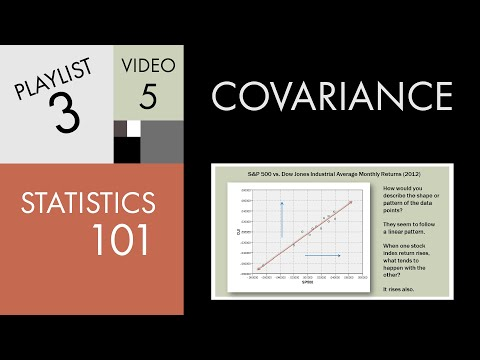

In [192]:
YouTubeVideo('xGbpuFNR1ME')

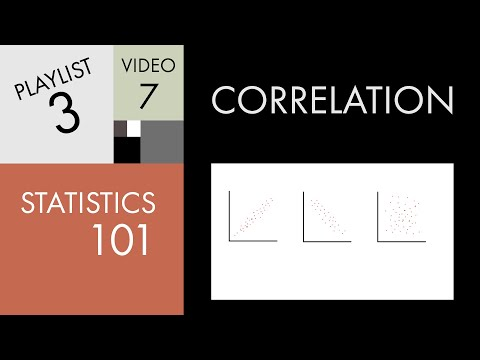

In [193]:
YouTubeVideo('4EXNedimDMs')

In [203]:
# python 2:  import pandas.io.data as pd
# python 3:  
# check your env in jupyter: !which python
# pip install pandas-datareader
# More detail: https://pydata.github.io/pandas-datareader/
from pandas_datareader import data as wb
import datetime

In [234]:
prices = wb.get_data_yahoo(['CTC-A.TO','SHOP'],
                              start = datetime.datetime(2020,1,1),
                             end=datetime.datetime(2020,5,1))['Adj Close']

In [235]:
prices.head()

Symbols       CTC-A.TO        SHOP
Date                              
2020-01-02  137.081299  407.809998
2020-01-03  136.983200  404.290009
2020-01-06  137.179367  413.329987
2020-01-07  139.455246  414.500000
2020-01-08  139.357147  418.100006

In [236]:
volume = wb.get_data_yahoo(['CTC-A.TO','SHOP'],
                              start = datetime.datetime(2020,1,1),
                             end=datetime.datetime(2020,5,1))['Volume']
volume.head()

Symbols     CTC-A.TO       SHOP
Date                           
2020-01-02  168947.0  1396700.0
2020-01-03  217997.0  1031700.0
2020-01-06  181029.0  1686000.0
2020-01-07  314411.0  1552900.0
2020-01-08  356378.0  1550100.0

In [237]:
rets= prices.pct_change()

In [238]:
# Correlation of the stocks
corr = rets.corr

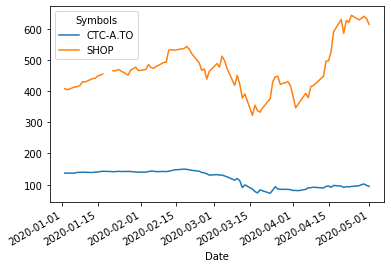

In [239]:
prices.plot()

In [240]:
%matplotlib inline

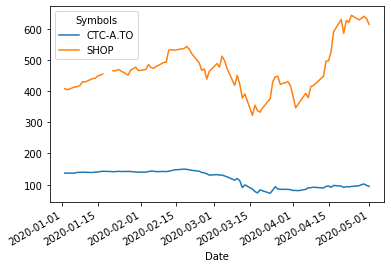

In [241]:
prices.plot()

In [281]:
# Export data for next lecture:
prices = wb.get_data_yahoo(['CTC-A.TO','SHOP'],
                              start = datetime.datetime(2020,1,1),
                             end=datetime.datetime(2020,5,1))['Adj Close']

In [283]:
prices.to_csv('stock_output_1.csv')

pandas.core.frame.DataFrame

## 10. Missing Data

In [242]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [243]:
data = Series(['one','two',np.nan,'four'])

In [244]:
data

0     one
1     two
2     NaN
3    four
dtype: object

In [245]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [246]:
data.dropna()

0     one
1     two
3    four
dtype: object

In [247]:
data

0     one
1     two
2     NaN
3    four
dtype: object

In [248]:
dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])

In [249]:
dframe

0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0
3  NaN  NaN  NaN

In [250]:
clean_dframe = dframe.dropna()

In [251]:
clean_dframe

0    1    2
0  1.0  2.0  3.0

In [252]:
dframe.dropna(how='all')

0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0

In [253]:
dframe.dropna(axis=1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

In [254]:
npn = np.nan
dframe2 = DataFrame([[1,2,3,npn],[2,npn,5,6],[npn,7,npn,9],[1,npn,npn,npn]])

In [255]:
dframe2

0    1    2    3
0  1.0  2.0  3.0  NaN
1  2.0  NaN  5.0  6.0
2  NaN  7.0  NaN  9.0
3  1.0  NaN  NaN  NaN

In [256]:
dframe2.dropna(thresh=2)

0    1    2    3
0  1.0  2.0  3.0  NaN
1  2.0  NaN  5.0  6.0
2  NaN  7.0  NaN  9.0

In [257]:
dframe2.dropna(thresh=1)

0    1    2    3
0  1.0  2.0  3.0  NaN
1  2.0  NaN  5.0  6.0
2  NaN  7.0  NaN  9.0
3  1.0  NaN  NaN  NaN

In [258]:
dframe2.dropna(thresh=3)

0    1    2    3
0  1.0  2.0  3.0  NaN
1  2.0  NaN  5.0  6.0

In [259]:
dframe2.fillna(1)

0    1    2    3
0  1.0  2.0  3.0  1.0
1  2.0  1.0  5.0  6.0
2  1.0  7.0  1.0  9.0
3  1.0  1.0  1.0  1.0

In [260]:
dframe

0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0
3  NaN  NaN  NaN

In [261]:
dframe2.fillna({0:0,1:1,2:2,3:3})

0    1    2    3
0  1.0  2.0  3.0  3.0
1  2.0  1.0  5.0  6.0
2  0.0  7.0  2.0  9.0
3  1.0  1.0  2.0  3.0

In [262]:
dframe2.fillna(0,inplace=True)

In [263]:
dframe2

0    1    2    3
0  1.0  2.0  3.0  0.0
1  2.0  0.0  5.0  6.0
2  0.0  7.0  0.0  9.0
3  1.0  0.0  0.0  0.0

## 11. Index Hierachy

In [264]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn

In [265]:
ser = Series(randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [266]:
ser

1  a   -0.063873
   b    0.802411
   c    0.346161
2  a   -0.838789
   b    1.092115
   c   -0.286729
dtype: float64

In [267]:
ser.index

MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )

In [268]:
ser[1]

a   -0.063873
b    0.802411
c    0.346161
dtype: float64

In [269]:
ser[2]

a   -0.838789
b    1.092115
c   -0.286729
dtype: float64

In [270]:
ser[:,'a']

1   -0.063873
2   -0.838789
dtype: float64

In [271]:
dframe = ser.unstack()

In [272]:
dframe

a         b         c
1 -0.063873  0.802411  0.346161
2 -0.838789  1.092115 -0.286729

In [273]:
dframe2 = DataFrame(np.arange(16).reshape(4,4),
                    index=[['a','a','b','b'],[1,2,1,2]],
                   columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])
dframe2

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [274]:
dframe2.index.names = ['INDEX_1','INDEX_2']
dframe2.columns.names = ['Cities','Temp']
dframe2

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [275]:
dframe2.swaplevel('Cities','Temp',axis=1)

Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [277]:
dframe2.sort_index(1)

Cities           LA   NY       SF
Temp            hot cold hot cold
INDEX_1 INDEX_2                  
a       1         2    0   1    3
        2         6    4   5    7
b       1        10    8   9   11
        2        14   12  13   15

In [278]:
dframe2.sum(level='Temp',axis=1)

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27